Check the hyperparameters in the successful fits.  

Calculate the cutoff for a successful fit within a confidence region, based on the assumption that the difference of the nllh's of the true and optimal parameter is chi^2 distributed with n_theta degrees of freedom.


--> not pursued because acc. to the CR there are hundreds of good fits, whereas by visual inspection, these are only about 13.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

import sys
from pathlib import Path
sys.path.append(str(Path(".").resolve().parent))

from helpers_boehm import load_exp_summary

dir_pipeline = Path(".").resolve().parents[1]
dir_5 = dir_pipeline / "5_optimisation"
output_path = Path(".") / "hyperparameters"
output_path.mkdir(exist_ok=True)

In [3]:
likelihood: str = "negLL_obs_trainval"
percentile: float = 95

SIMULTANEOUS = "simultaneous"
POINTWISE = "pointwise"
cr_option = POINTWISE

In [4]:
# import the results
problem_name = "Boehm_papa_export_kinetic"
experiment_name = "2024_08_01_Boehm_papa_export_kinetic"

summary = load_exp_summary(dir_5 / experiment_name).sort_values(by=likelihood)

# add reg bins
bins_reg = [-1, 1e-4,    1e-2,  1e-1,   1]
labels_reg = ["0", "<0.01", "<0.1", "<1"]
# bins_reg = [-1] + [10**x for x in [-3, -2.5, -2, -1.5, -1, -0.5, 0]]
# labels_reg = ["0", "3-2.5", "2.5-2", "2-1.5", "1.5-1", "1-0.5", "0.5-0"]
summary["regbin"] = pd.cut(summary['λ_reg'], bins=bins_reg, labels=labels_reg)

# add learning rate bins
# bins_lr = [1e-4,   1e-3,    1e-2]
# labels_lr = ["<0.001", "<0.01"]
bins_lr = [10**x for x in [-4, -3.5, -3, -2.5, -2]]
labels_lr = ["4-3.5", "3.5-3", '3-2.5', '2.5-2']
summary["lr_bin"] = pd.cut(summary['lr_adam'], bins=bins_lr, labels=labels_lr)

hyperprameters = ["regbin", "lr_bin", "nn_input_normalization"]

summary["regbin"].value_counts()

regbin
<1       732
<0.1     731
<0.01    698
0        556
Name: count, dtype: int64

In [5]:
# optimal point as base:
fval_opt = summary[likelihood][0]
if cr_option == SIMULTANEOUS:
    # degrees of freedom is equal to the number of parameters
    df = 9 + 117  # theta_MM + theta_ANN
elif cr_option == POINTWISE:
    # degrees of freedom is equal to 1
    df = 1

range = chi2.ppf(q=percentile / 100, df=df)

cut_off = fval_opt + range

print('optimal fval ', fval_opt)
print('threshold    ', cut_off)
print('# within CR: ', summary[summary[likelihood] < cut_off].shape[0])

optimal fval  201.31893425173564
threshold     205.16039307242977
# within CR:  479


In [6]:
best = summary.iloc[:13]
# best = summary[summary[likelihood] < cut_off]

best

,ude_nr,problem_name,noise_level,sparsity,hidden_layers,hidden_neurons,act_fct,nn_input_normalization,startpoint_method,startpoint_id,...,nmse_hidden_test,negLL_obs_train,negLL_obs_val,negLL_obs_trainval,negLL_obs_test,sd_pSTAT5A_rel,sd_pSTAT5B_rel,sd_rSTAT5A_rel,regbin,lr_bin
109,110,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,110,...,NaN,80.535693,21.455856,101.991549,NaN,2.955159,5.431534,5.672741,<0.01,4-3.5
259,261,boehm_papa_export_kinetic,-,16,3,5,tanh,1,lhs,261,...,NaN,79.956105,22.336077,102.292182,NaN,3.224733,5.351475,5.353477,0,2.5-2
56,57,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,57,...,NaN,76.278354,26.938474,103.216828,NaN,3.415591,6.307502,3.670143,0,2.5-2
377,379,boehm_papa_export_kinetic,-,16,3,5,tanh,1,lhs,379,...,NaN,78.379710,24.849832,103.229542,NaN,3.740840,4.934740,5.488364,<1,2.5-2
241,243,boehm_papa_export_kinetic,-,16,3,5,tanh,1,lhs,243,...,NaN,84.603982,18.801125,103.405107,NaN,11.946169,3.569913,4.179558,<0.1,2.5-2
393,395,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,395,...,NaN,80.377848,24.532921,104.910769,NaN,3.219863,5.663792,5.960464,0,2.5-2
25,26,boehm_papa_export_kinetic,-,16,3,5,tanh,1,lhs,26,...,NaN,83.282772,23.242476,106.525248,NaN,4.450222,6.137333,6.314308,<1,3.5-3
181,183,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,183,...,NaN,86.712070,22.066685,108.778755,NaN,4.433127,9.166425,4.654560,<0.1,3-2.5
364,366,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,366,...,NaN,97.018068,17.925229,114.943298,NaN,7.238254,8.866314,2.677426,0,2.5-2
343,345,boehm_papa_export_kinetic,-,16,3,5,tanh,0,lhs,345,...,NaN,94.782045,23.199685,117.981730,NaN,2.237801,5.452139,26.703205,<0.01,3-2.5


/tmp/ipykernel_1187517/3076442876.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1187517/3076442876.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


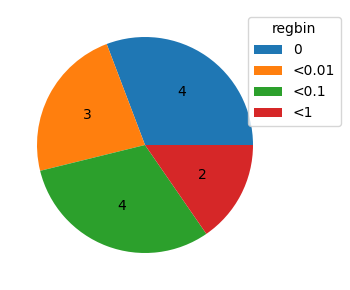

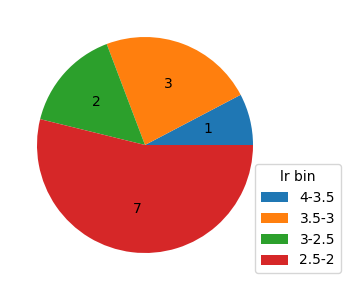

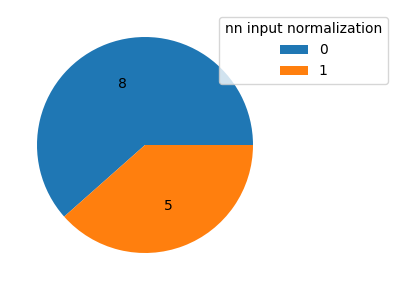

In [7]:
for hp in hyperprameters:
    fig, ax = plt.subplots(figsize=(5, 3))
    # calc and sort the # fits/hp setting
    hp2plot = best[hp].value_counts().sort_index()

    def absolute_value(val):
        a  = int(val/100.*hp2plot.values.sum())
        return a

    wedges, texts, autotexts = ax.pie(
        hp2plot.values, autopct=absolute_value,
    )
    ax.legend(
        wedges, hp2plot.index,
        title=hp2plot.index.name.replace("_", " "),
        bbox_to_anchor=(0.75, 0, 0.5, 1)
    )
    fig.show()
    fig.tight_layout()
    fig.savefig(output_path / f"pie_{hp}.svg", transparent=True)

### Scatter likelihood and continuous hyperparameter setting

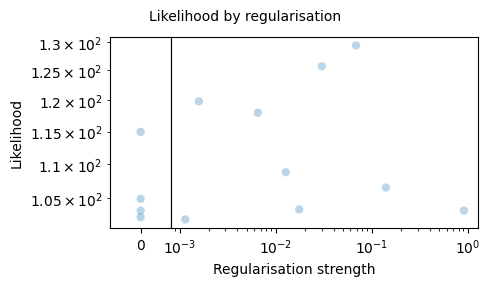

In [8]:
# scatter plot metric by reg.
fig, ax = plt.subplots(
    figsize=(5,3),
    ncols=2, 
    gridspec_kw={
        'width_ratios': [1, 5], 
        'wspace': 0,
    },
    sharex="col", sharey="row",
)
fig.suptitle(
    f"Likelihood by regularisation", 
    fontsize="medium", y=0.94,
)
# no regularisation
best0 = best.query("λ_reg == 0")
ax[0].scatter(best0["λ_reg"], best0[likelihood], alpha=0.3, edgecolor="none")
# reg on log scale
ax[1].scatter(best["λ_reg"], best[likelihood], alpha=0.3, edgecolor="none")
# scale
for axis in ax:
    axis.set_yscale("log")
ax[1].set_xscale("log")
ax[1].tick_params(left=False, which="both")
ax[0].set_xticks(ticks=[0], labels=[0])
# labeling
ax[1].set_xlabel("Regularisation strength", x=0.4)
ax[0].set_ylabel("Likelihood")
# save
fig.tight_layout()
fig.savefig(output_path / f"scatter_likelihood_by_reg.svg", transparent=True)